In [16]:
from database.insert import *
from database.models import *
from database.functions import *
from database.session import session
from simulation.functions import *
import pandas as pd
import numpy as np


base = 'USD'
portfolio_name = 'portfolio' + base


data = get_portfolio_data(portfolio_name,base)


asset_logreturns = data[0]
currency_list = data[1]
fx_logreturns = data[2]
fwd_logreturns = data[3]
weights = data[4]
df_hedge = data[5]
factors = data[6]

depths = [2, 3, 4]
lrs = [0.01, 0.05, 0.1]
n_estimators = [50, 100]

max = 3 * 3 *2
now = 0

results = []


for depth in depths:
    for lr in lrs:
        for n_estimator in n_estimators:
            dict_params = {
            'n_estimators': n_estimator,
            'max_depth': depth,
            'learning_rate': lr,
            'n_jobs': -1
            }


            predict = xgboost(currency_list,
                              df_hedge,
                              factors,
                              xgb_factor=dict_params,
                              xgb_predictors=dict_params,
                              duration = 2)


            dict = predict[2]
            mean_hit_ratio = sum(dict.values()) / len(dict)

            results.append({
                'depth': depth,
                'learning_rate': lr,
                'n_estimators': n_estimator,
                'mean_hit_ratio': mean_hit_ratio
            })

            now += 1
            print(str(now) + '/' + str(max))
             #  - - - - - -- - - - -- - - -- - - - -- - -










1/9 — 73.65 seconds left
2/9 — 59.58 seconds left
3/9 — 51.74 seconds left
4/9 — 42.56 seconds left
5/9 — 34.72 seconds left
6/9 — 26.13 seconds left
7/9 — 17.09 seconds left
8/9 — 8.52 seconds left
9/9 — 0.0 seconds left
1/18
1/9 — 128.44 seconds left
2/9 — 113.02 seconds left
3/9 — 96.75 seconds left
4/9 — 80.01 seconds left
5/9 — 63.94 seconds left
6/9 — 47.95 seconds left
7/9 — 32.18 seconds left
8/9 — 15.93 seconds left
9/9 — 0.0 seconds left
2/18
1/9 — 68.83 seconds left
2/9 — 59.31 seconds left
3/9 — 53.19 seconds left
4/9 — 43.51 seconds left
5/9 — 33.84 seconds left
6/9 — 25.48 seconds left
7/9 — 17.09 seconds left
8/9 — 8.78 seconds left
9/9 — 0.0 seconds left
3/18
1/9 — 129.64 seconds left
2/9 — 112.55 seconds left
3/9 — 97.6 seconds left
4/9 — 80.7 seconds left
5/9 — 65.35 seconds left
6/9 — 48.43 seconds left
7/9 — 33.15 seconds left
8/9 — 16.04 seconds left
9/9 — 0.0 seconds left
4/18
1/9 — 68.07 seconds left
2/9 — 60.79 seconds left
3/9 — 51.54 seconds left
4/9 — 42.68 s

In [12]:
from database.insert import *
from database.models import *
from database.functions import *
from database.session import session
from simulation.functions import *
import pandas as pd
import numpy as np


base = 'CHF'
portfolio_name = 'portfolio' + base


data = get_portfolio_data(portfolio_name,base)


asset_logreturns = data[0]
currency_list = data[1]
fx_logreturns = data[2]
fwd_logreturns = data[3]
weights = data[4]
df_hedge = data[5]
factors = data[6]


windows = [50,60,70,80]
durations = [1,2,3,4,10,20,15]
max = 7 * 4
now = 0

results = []


for window in windows:
        for duration in durations:



            predict = xgboost(currency_list,
                              df_hedge,
                              factors,
                              window = window,
                              duration = duration)


            dict = predict[2]
            mean_hit_ratio = sum(dict.values()) / len(dict)

            results.append({
                'window': window,
                'duration': duration,

                'mean_hit_ratio': mean_hit_ratio
            })

            now += 1
            print(str(now) + '/' + str(max))
             #  - - - - - -- - - - -- - - -- - - - -- - -








1/9 — 183.78 seconds left
2/9 — 160.84 seconds left
3/9 — 136.41 seconds left
4/9 — 119.97 seconds left
5/9 — 100.74 seconds left
6/9 — 70.88 seconds left
7/9 — 48.72 seconds left
8/9 — 23.77 seconds left
9/9 — 0.0 seconds left
1/28
1/9 — 97.19 seconds left
2/9 — 85.55 seconds left
3/9 — 68.69 seconds left
4/9 — 59.94 seconds left
5/9 — 47.07 seconds left
6/9 — 35.18 seconds left
7/9 — 23.15 seconds left
8/9 — 11.58 seconds left
9/9 — 0.0 seconds left
2/28
1/9 — 64.05 seconds left
2/9 — 54.51 seconds left
3/9 — 48.71 seconds left
4/9 — 43.13 seconds left
5/9 — 35.99 seconds left
6/9 — 23.3 seconds left
7/9 — 16.04 seconds left
8/9 — 7.81 seconds left
9/9 — 0.0 seconds left
3/28
1/9 — 46.89 seconds left
2/9 — 42.85 seconds left
3/9 — 34.55 seconds left
4/9 — 30.27 seconds left
5/9 — 23.15 seconds left
6/9 — 18.0 seconds left
7/9 — 12.42 seconds left
8/9 — 6.36 seconds left
9/9 — 0.0 seconds left
4/28
1/9 — 19.71 seconds left
2/9 — 18.48 seconds left
3/9 — 15.39 seconds left
4/9 — 13.82 

In [31]:
results_dfUSD = pd.DataFrame(results)
results_dfUSD
results_df

,depth,learning_rate,n_estimators,mean_hit_ratio
0,2,0.01,50,0.483750
1,2,0.01,100,0.502924
2,2,0.05,50,0.512510
3,2,0.05,100,0.522122
4,2,0.10,50,0.524030
5,2,0.10,100,0.521139
6,3,0.01,50,0.489505
7,3,0.01,100,0.503906
8,3,0.05,50,0.502949
9,3,0.05,100,0.508704


In [21]:
results_dfUSD

,depth,learning_rate,n_estimators,mean_hit_ratio
0,2,0.01,50,0.491371
1,2,0.01,100,0.511511
2,2,0.05,50,0.532592
3,2,0.05,100,0.541246
4,2,0.10,50,0.530676
5,2,0.10,100,0.526853
6,3,0.01,50,0.487548
7,3,0.01,100,0.502899
8,3,0.05,50,0.536457
9,3,0.05,100,0.533583


KeyboardInterrupt: 

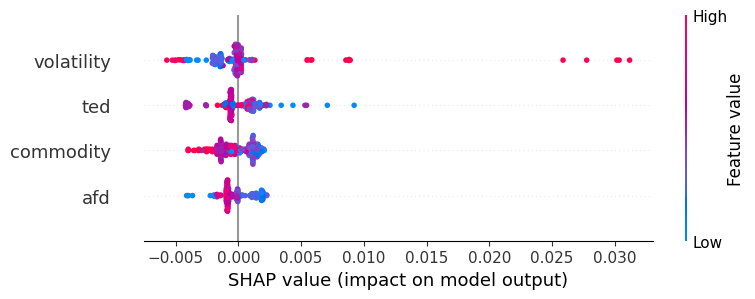

In [63]:

from simulation.functions import *
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
import shap
import matplotlib.pyplot as plt

base = 'USD'
portfolio_name = 'portfolio' + base


data = get_portfolio_data(portfolio_name,base)


asset_logreturns = data[0]
currency_list = data[1]
fx_logreturns = data[2]
fwd_logreturns = data[3]
weights = data[4]
df_hedge = data[5]
factors = data[6]

dict_params = {
            'n_estimators': 100,
            'max_depth': 2,
            'learning_rate': 0.05,
            'n_jobs': -1
            }


dollar = factors['dollar']
carry = factors['carry']
predictors = factors.drop(columns = ['carry','dollar'])

model_dollar = XGBRegressor(**dict_params)
model_carry = XGBRegressor(**dict_params)

model_dollar.fit(predictors,dollar)
model_carry.fit(predictors,carry)



explainer_carry = TreeExplainer(model_carry)



shap_values = explainer_carry(predictors)


shap_values
# Summary Plot
shap.summary_plot(shap_values, predictors)

In [64]:

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Nehme an, du hast bereits diese Daten vorbereitet:
# predictors: DataFrame mit Spalten ['ted', 'volatility', 'afd', 'commodity']
# carry: Zielvariable (Pandas Series)

# Kombiniere alles in ein DataFrame
df = predictors.copy()
df['carry'] = carry

# Baue das lineare Regressionsmodell
model = smf.ols('carry ~ ted + volatility + afd + commodity', data=df).fit()

# Zusammenfassung mit R², p-Werten etc.
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  carry   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     3.546
Date:                Mon, 26 May 2025   Prob (F-statistic):            0.00764
Time:                        10:04:20   Log-Likelihood:                 772.93
No. Observations:                 293   AIC:                            -1536.
Df Residuals:                     288   BIC:                            -1517.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0005      0.001      0.417      0.6

1/9 — 89.82 seconds left
2/9 — 79.2 seconds left
3/9 — 66.46 seconds left
4/9 — 56.98 seconds left
5/9 — 45.35 seconds left
6/9 — 33.84 seconds left
7/9 — 22.56 seconds left
8/9 — 11.07 seconds left
9/9 — 0.0 seconds left


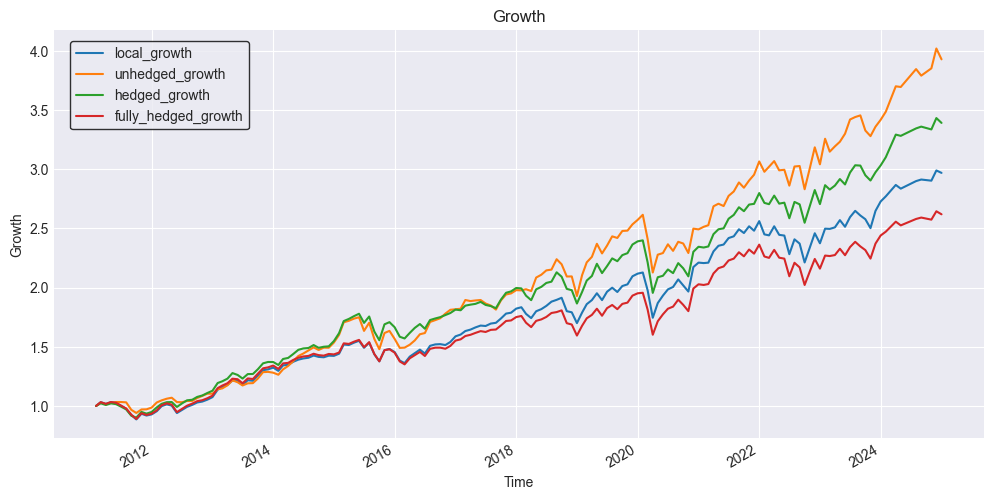

In [68]:
from database.insert import *
from database.models import *
from database.functions import *
from database.session import session
from simulation.functions import *
import pandas as pd
import numpy as np


base = 'SEK'
portfolio_name = 'portfolio' + base


data = get_portfolio_data(portfolio_name,base)


asset_logreturns = data[0]
currency_list = data[1]
fx_logreturns = data[2]
fwd_logreturns = data[3]
weights = data[4]
df_hedge = data[5]
factors = data[6]

predict = xgboost(currency_list,
                  df_hedge,
                  factors,
                  duration =2)

hedge_ratios = predict[0]

df = simulate_portfolio(asset_logreturns,
                        currency_list,
                        fx_logreturns,
                        fwd_logreturns,
                        weights,
                        hedge_ratios,
                        start = '2011-01-01',
                        end = '2024-12-31',
                        fx_portfolio = False)

plot_simulation(df)
